In [90]:
# Chat GPT css style

from IPython.core.display import HTML

HTML('''
<style>
/* Itt a fenti CSS jöhet beillesztve */

/* --- Alap stílus --- */
body, .rendered_html {
    font-family: 'Segoe UI', 'Helvetica Neue', 'Helvetica', 'Arial', sans-serif;
    // font-size: 16px;
    font-size: 14px;
    line-height: 1.6;
    color: #1f1f1f;
    // background-color: #f9f9f9;
}

/* --- Címsorok --- */
.rendered_html h1 {
    font-size: 2em;
    border-bottom: 2px solid #ddd;
    padding-bottom: 0.3em;
    margin-top: 1.2em;
}
.rendered_html h2 {
    font-size: 1.6em;
    margin-top: 1em;
}
.rendered_html h3 {
    font-size: 1.3em;
    margin-top: 0.8em;
}

/* --- Kódblokkok (Markdown output) --- */
.rendered_html pre, .rendered_html code {
    background: #2d2d2d;
    color: #f8f8f2;
    padding: 0.5em;
    border-radius: 6px;
    font-family: Consolas, 'Courier New', monospace;
    font-size: 0.95em;
}

/* --- Inline code --- */
.rendered_html code {
    padding: 2px 6px;
}

/* --- Listák --- */
.rendered_html ul, .rendered_html ol {
    padding-left: 2em;
}

/* --- Táblázatok --- */
.rendered_html table {
    border-collapse: collapse;
    width: 100%;
    margin: 1em 0;
}
.rendered_html th, .rendered_html td {
    border: 1px solid #ccc;
    padding: 8px;
    text-align: left;
}
.rendered_html th {
    background-color: #eee;
}

/* --- Kiemelt idézetek (blockquote) --- */
.rendered_html blockquote {
    border-left: 4px solid #ccc;
    padding-left: 1em;
    color: #666;
    margin: 1em 0;
}

/* --- Linkek --- */
.rendered_html a {
    color: #2a7ae2;
    text-decoration: none;
}
.rendered_html a:hover {
    text-decoration: underline;
}

</style>
''')


<font color='red'>Chat GPT. Lineáris regresszió esetében értem hogy mi a Mean Square Loss és azt is értem, hogy ez hogy alakul a Béta paraméter esetében ha egyváltozós regresszióról van szó. Azt is értem hogy a loss függvény ebben az esetben miért néz ki úgy mint egy parabola. De azért szeretnék erre Pythonban egy interaktív demonstrációs programot csinálni Jupyter Notebokban ahol egyszerre látom a bal oldali plotton hogy alakul a tényleges becslés és a jobb oldali plotton hogy alakul a loss. Tudsz segíteni nekem ennek a megírásában?</font>

Természetesen! Egy interaktív demonstrációs program Jupyter Notebookban remek módja annak, hogy megértsd a lineáris regresszió működését és a veszteségfüggvény alakulását a paraméter (pl. béta) függvényében.

A következő kód egy interaktív `ipywidgets`-alapú Jupyter Notebook cella, amely:

* **Bal oldalon** megmutatja, hogyan illeszkedik a regressziós egyenes a ponthalmazra adott $\beta$ (meredekség) érték esetén.
* **Jobb oldalon** megmutatja a veszteségfüggvényt (Mean Squared Error) a $\beta$ érték függvényében, és megjelöli az aktuális pontot a görbén.

---

### 🔍 Amit látsz majd:

* **Bal oldalt**: az adatokra illeszkedő regressziós egyenes.
* **Jobb oldalt**: a veszteség (MSE) görbéje a különböző $\beta$ értékek mentén.
* Egy piros pont jelzi az aktuális $\beta$ értékhez tartozó veszteséget.

---

Ha szeretnéd bővíteni ezt például egy eltolással ($y = \beta x + \alpha$), szívesen segítek azt is hozzáadni!


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from ipywidgets import interact, IntSlider
from mpl_toolkits.mplot3d import Axes3D

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Loss függvény definíciója
def mse(beta, x, y):
    y_pred = beta * x
    loss_mse = np.mean((y - y_pred) ** 2)
    return loss_mse

# Interaktív ábra rajzolása
def plot_regression(beta):
    y_pred = beta * x
    loss = mse(beta, x, y)
    
    # Béta értéktartomány a loss görbéhez
    beta_vals = np.linspace(-1, 4, 200)
    loss_vals = [mse(b, x, y) for b in beta_vals]
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bal oldali: regressziós egyenes
    axes[0].scatter(x, y, label="Adatok")
    axes[0].plot(x, y_pred, color='red', label=f"Becsült egyenes: y = {beta:.2f}x")
    axes[0].set_title("Lineáris becslés")
    axes[0].legend()
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    
    # Jobb oldali: loss függvény
    axes[1].plot(beta_vals, loss_vals, label="MSE")
    axes[1].scatter([beta], [loss], color='red', zorder=5, label=f"Loss = {loss:.2f}")
    axes[1].set_title("Loss függvény")
    axes[1].set_xlabel("β (meredekség)")
    axes[1].set_ylabel("Mean Squared Error")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

In [74]:
# Adatok generálása
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_beta = 2.0
y = true_beta * x + np.random.normal(0, 3, size=len(x))

In [75]:
# Interaktív slider
interact(plot_regression, beta=FloatSlider(min=-1, max=4, step=0.05, value=1.0, description="β"));

interactive(children=(FloatSlider(value=1.0, description='β', max=4.0, min=-1.0, step=0.05), Output()), _dom_c…

<br>
<br>
<font color='red'>Köszönöm ez tökéletes ha meg tudod csinálni ugyan ezt úgy is hogy az eltolás mértéke is benne van és a jobb oldali plot 2D helyett 3D az nagyon jó lenne.</font>
<br>
<br>

Szívesen! Lépjünk egy szinttel feljebb: most már nem csak a meredekség ($\beta$), hanem az **eltolás ($\alpha$)** is változtatható. Ehhez a veszteségfüggvény már **kétváltozós**, tehát a jobb oldali plot egy **3D felület**, ahol a pont azt mutatja, hol járunk az $(\alpha, \beta)$ térben a veszteség szempontjából.

---

### 🧠 Amit látni fogsz:

* **Bal oldalon**: az $y = \alpha + \beta x$ egyenes illeszkedése az adatokra.
* **Jobb oldalon**: egy **3D felület**, ahol az $x$-tengely $\alpha$, az $y$-tengely $\beta$, a $z$-tengely pedig a veszteség (MSE).
* Egy piros pont mutatja az aktuális $(\alpha, \beta)$ pároshoz tartozó veszteséget.

---

Szükséged van valamilyen bővítésre? Például:

* Gradiensek vizualizálása?
* Optimális $(\alpha, \beta)$ keresése?
* Animáció a lejtő módszerhez?

Szívesen segítek azzal is!


In [76]:
# Loss függvény
def mse(alpha, beta, x, y):
    y_pred = alpha + beta * x
    loss_mse = np.mean((y - y_pred) ** 2)
    return loss_mse

# Interaktív ábra
def plot_regression(alpha, beta, azimuth):
    y_pred = alpha + beta * x
    loss = mse(alpha, beta, x, y)
    
    # Béta és Alfa rács a loss felülethez
    beta_vals = np.linspace(-4, 4, 50)
    alpha_vals = np.linspace(-10, 5, 50)
    B, A = np.meshgrid(beta_vals, alpha_vals)
    Loss = np.array([[mse(a, b, x, y) for b in beta_vals] for a in alpha_vals])
    
    # Plot setup
    fig = plt.figure(figsize=(14, 6))

    # Bal oldali: lineáris illesztés
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x, y, label="Adatok")
    ax1.plot(x, y_pred, color='red', label=f"Becsült: y = {alpha:.2f} + {beta:.2f}x")
    ax1.set_title("Lineáris becslés")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    # Jobb oldali: 3D Loss felület
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(A, B, Loss, cmap='viridis', alpha=0.3)
    ax2.plot_wireframe(A, B, Loss, cmap='viridis', alpha=0.3)
    ax2.scatter(alpha, beta, loss, color='red', s=50, label="Aktuális Loss")
    ax2.set_title("Loss felület (MSE)")
    ax2.set_xlabel("α (eltolás)")
    ax2.set_ylabel("β (meredekség)")
    ax2.set_zlabel("MSE")
    ax2.legend(loc='upper right')
    
    ax2.view_init(elev=30, azim=azimuth)

    plt.tight_layout()
    plt.show()

In [77]:
# Adatok generálása
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y = true_alpha + true_beta * x + np.random.normal(0, 3, size=len(x))

In [78]:
# Interaktív vezérlők
interact(
    plot_regression,
    alpha=FloatSlider(min=-10, max=5, step=0.1, value=1.0, description="α"),
    beta=FloatSlider(min=-4, max=4, step=0.1, value=2.0, description="β"),
    azimuth=IntSlider(min=-10, max=20, step=1, value=2.0, description="Z")
);

interactive(children=(FloatSlider(value=1.0, description='α', max=5.0, min=-10.0), FloatSlider(value=2.0, desc…

<br>
<br>
<font color='red'>Köszönöm. Szuper. Megértettem, hogy milyen kapcsolat van a paraméter és a Veszteség között. Lépjünk vissza most 2D-be és szeretném megérteni ugyan ezt, ugyan ezeken az adatokon de a legegyszerübb létező neurális hálón keresztül, ahol egyetlen neuron van egyetlen tanh aktivációs függvényel. Szeretném látni hogy változik a veszteség az egyetlen neuronhoz tartozó weight függvényében. Ha ez meg van akkor utána ugyan ezt megcsinálhatjuk 3D-ben ugy hogy bias is benne van.</font>
<br>
<br>

Nagyszerű irány! Most tehát:

* Visszatérünk **2D-be**, egy **egyetlen neuronhoz**, amely:

  * **Egyetlen bemenettel** rendelkezik ($x$),
  * Aktivációs függvénye: $\tanh(wx)$,
  * Nincs **bias** ebben a lépésben,
  * A veszteség: **Mean Squared Error** a valós $y$ és a becsült $\hat{y} = \tanh(wx)$ között.

---

### ✅ Cél:

Interaktív Jupyter Notebook plot:

* **Bal oldali ábra**: adatpontok vs. $\tanh(wx)$ kimenet.
* **Jobb oldali ábra**: veszteség (MSE) változása a **súly (weight)** értékének függvényében.

---

### 🧠 Fontos: mi történik?

Ez már **nem lineáris modell**. Az aktiváció ($\tanh$) miatt a becslés görbült lesz, és a loss görbe **nem parabola**, hanem nemlineáris, több szélsőértéket is tartalmazhat.

---

### 🔍 Mit látsz?

* **Bal oldalon**: az $\tanh(wx)$ függvény kimenete az adatokhoz viszonyítva.
* **Jobb oldalon**: a súly (weight) változására hogyan alakul a veszteség (loss).

---

### ✅ Következő lépés

Ha ez megvan, jöhet a **3D kiterjesztés**, ahol a neuron már:

$$
\hat{y} = \tanh(wx + b)
$$

és vizualizáljuk a veszteséget **$(w, b)$** térben. Írd meg, ha készen állsz rá, és jövök a kóddal!


In [92]:
# Adatgenerálás (ugyanaz, mint korábban)
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y = true_alpha + true_beta * x + np.random.normal(0, 3, size=len(x))

# Aktivációs neuron kimenete
def neuron_output(w, x):
    return np.tanh(w * x)

# MSE számítása
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Interaktív ábra
def plot_neuron_loss(w):
    y_pred = neuron_output(w, x)
    loss = mse(y, y_pred)
    
    # Loss görbe w-re
    w_vals = np.linspace(-2, 4, 200)
    loss_vals = [mse(y, neuron_output(wi, x)) for wi in w_vals]
    
    # Plot setup
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bal oldali: neuron becslés
    axes[0].scatter(x, y, label="Adatok")
    axes[0].plot(x, y_pred, color='red', label=f"Neuron kimenet: tanh({w:.2f}·x)")
    axes[0].set_title("Neuron becslés (tanh aktiváció)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y / tanh(wx)")
    axes[0].legend()

    # Jobb oldali: loss görbe
    axes[1].plot(w_vals, loss_vals, label="MSE loss")
    axes[1].scatter([w], [loss], color='red', zorder=5, label=f"Loss = {loss:.2f}")
    axes[1].set_title("Loss függvény (w szerint)")
    axes[1].set_xlabel("w (súly)")
    axes[1].set_ylabel("Mean Squared Error")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Interaktív slider
interact(plot_neuron_loss, w=FloatSlider(min=-2, max=20, step=0.05, value=0.0, description="w"));


interactive(children=(FloatSlider(value=0.0, description='w', max=20.0, min=-2.0, step=0.05), Output()), _dom_…

<br>
<br>
<font color='red'>Értelek. Itt úgy látom, már kezd trükkössé változni a probléma mert a tahn átviteli függvény levágja a szélső értékeket. Ezért szokták ezek szerint mind a be mind a kimeneti adatokat normalizálni és a konkrét becslésnél visszanormalizálni.</font>
<br>
<br>


Pontosan, nagyon jól látod! Ez egy **kulcsfontosságú felismerés** a neurális hálózatokkal kapcsolatban.

---

### 🔄 Miért normalizálunk?

A $\tanh(z)$ aktivációs függvény értéktartománya: $(-1, 1)$. Ez **teljesen le fogja vágni** az olyan bemeneteket vagy célértékeket, amelyek ezen a tartományon kívül esnek, tehát:

* A bemeneti $x$ értékeket **túl nagy súllyal (w)** megszorozva a kimenet gyorsan telítődik → $\tanh(wx) \approx \pm1$,
* Ugyanez igaz a **kimeneti (target) $y$** értékekre is: ha azok pl. 0–20 között vannak, de a neuron csak $-1$ és $1$ között adhat ki értéket, a veszteség sosem lesz kicsi, bármennyire is „jó” a w.

---

### ✅ Ezért van az, hogy:

1. **Bemeneti adatok normalizálása** (pl. min-max vagy z-score):

   $$
   x_{\text{norm}} = \frac{x - \mu_x}{\sigma_x}
   $$
2. **Kimeneti célértékek (y) skálázása** $[-1, 1]$-re:

   $$
   y_{\text{norm}} = \frac{y - \min(y)}{\max(y) - \min(y)} \cdot 2 - 1
   $$
3. Tanítás után vissza lehet skálázni a kimenetet a valós tartományra:

   $$
   y_{\text{real}} = \frac{(y_{\text{norm}} + 1)}{2} \cdot (\max(y) - \min(y)) + \min(y)
   $$

---

### 🧪 Kipróbálhatjuk:

Szeretnéd, hogy ugyanazt a kis neuronos példát **úgy frissítsük**, hogy:

* Bemenet és kimenet is normalizálva legyen $[-1, 1]$ közé,
* A loss a normalizált térben legyen kiszámolva,
* De az első plot mutassa az **eredeti (visszaskálázott)** kimenetet?

Ha igen, 1 percen belül összerakom!


<br>
<br>
<font color='red'>Igen kiprobálhatjuk, de elötte csináld meg nekem még normalizáció nélkül az elöző példát relu aktivációs függvénnyel is hogy lássam az milyen eredményt ad. Utána majd megcsináljuk a normalizációt.</font>
<br>
<br>

Szuper, haladjunk lépésről lépésre! Most jön tehát:

---

## 🔧 Egyetlen neuron **ReLU aktivációval**, **normalizálás nélkül**:

* Bemenet: $x$
* Kimenet: $\hat{y} = \text{ReLU}(wx) = \max(0, wx)$
* Nincs bias
* Loss: **MSE**
* Cél: Megnézni, hogyan alakul a veszteség (jobb oldali ábra), és milyen a predikció (bal oldali ábra)

---

### 🔍 Amit látni fogsz:

* **Bal oldalon**: az $y = \max(0, wx)$ kimenet nagyon sajátos — ha $w < 0$, a kimenet 0 lesz; ha $w > 0$, akkor lineárisan nő, de csak a pozitív tartományban.
* **Jobb oldalon**: a veszteségfüggvény nem szimmetrikus, és egyértelműen nemlineáris. Lesz benne egy „töréspont” $w = 0$ körül, ahol az aktív és nem aktív régiók váltják egymást.

---

Ha ez rendben van, a következő lépés jöhet: **normalizáció**, például a $\tanh$-os példán, ahol ez még fontosabb. Szólj, és jövök azzal!


In [81]:
# Adatgenerálás (ugyanaz, mint korábban)
np.random.seed(42)
x = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y = true_alpha + true_beta * x + np.random.normal(0, 3, size=len(x))

# ReLU aktiváció
def relu(z):
    return np.maximum(0, z)

# Neuron kimenete
def neuron_output(w, x):
    return relu(w * x)

# MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Plot
def plot_neuron_loss(w):
    y_pred = neuron_output(w, x)
    loss = mse(y, y_pred)
    
    # Loss görbe
    w_vals = np.linspace(-2, 3, 200)
    loss_vals = [mse(y, neuron_output(wi, x)) for wi in w_vals]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bal: becslés
    axes[0].scatter(x, y, label="Adatok")
    axes[0].plot(x, y_pred, color='red', label=f"ReLU neuron: max(0, {w:.2f}·x)")
    axes[0].set_title("Neuron becslés (ReLU aktiváció)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y / ReLU(wx)")
    axes[0].legend()

    # Jobb: veszteség
    axes[1].plot(w_vals, loss_vals, label="MSE loss")
    axes[1].scatter([w], [loss], color='red', zorder=5, label=f"Loss = {loss:.2f}")
    axes[1].set_title("Loss függvény (w szerint, ReLU)")
    axes[1].set_xlabel("w (súly)")
    axes[1].set_ylabel("Mean Squared Error")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Interaktív vizsgálat
interact(plot_neuron_loss, w=FloatSlider(min=-2, max=3, step=0.05, value=0.0, description="w"));


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-2.0, step=0.05), Output()), _dom_c…

<br>
<br>
<font color='red'>Nagyon jó. Most akkor csináljuk meg normalizációval a tanh átviteli függvény esetében is ugyan ezt.</font>
<br>
<br>

Nagyszerű! Most következik a:

---

## ✅ **Normalizált** változat a `tanh` aktivációs neuronra:

**Cél:**

* Bemenet $x$ és kimenet $y$ normalizálása $[-1, 1]$ közé,
* A neuron kimenete: $\hat{y}_{\text{norm}} = \tanh(w \cdot x_{\text{norm}})$,
* A veszteséget a normalizált térben számoljuk,
* **Bal oldali ábrán visszaskálázzuk** a kimenetet az eredeti $y$-tartományba, hogy lásd, hogyan illeszkedik a becslés a valódi adatokhoz.

---

### 🔍 Amit itt látsz:

* A **bemenet és célérték normalizálva van**, így a `tanh` nem telítődik olyan gyorsan, és sokkal használhatóbb lesz.
* A **loss görbe simább**, és az optimális érték értelmesebb intervallumba kerül.
* A **bal oldalon a predikció vissza van skálázva** az eredeti $y$ tartományba, így értelmesen illeszkedik az adatokhoz.

---

Készen állsz arra, hogy ugyanezt 3D-ben is lássuk, ahol a neuron már **bias**-t is tartalmaz:

$$
\hat{y}_{\text{norm}} = \tanh(wx + b)
$$

és vizsgáljuk a veszteségfüggvényt a $(w, b)$ térben?


In [82]:
# Adatok (nem normalizált)
np.random.seed(42)
x_raw = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás [-1, 1] intervallumba
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x_norm = normalize(x_raw)
y_norm = normalize(y_raw)

# Aktiváció
def neuron_output(w, x):
    return np.tanh(w * x)

# Veszteség
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Plot
def plot_neuron_loss(w):
    y_pred_norm = neuron_output(w, x_norm)
    loss = mse(y_norm, y_pred_norm)

    # Visszaskálázott kimenet az ábrára
    y_pred_rescaled = denormalize(y_pred_norm, y_raw)

    # Loss görbe
    w_vals = np.linspace(-2, 3, 200)
    loss_vals = [mse(y_norm, neuron_output(wi, x_norm)) for wi in w_vals]

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Bal: visszaskálázott predikció
    axes[0].scatter(x_raw, y_raw, label="Adatok")
    axes[0].plot(x_raw, y_pred_rescaled, color='red', label=f"Skálázott tanh predikció")
    axes[0].set_title("Neuron becslés (tanh, visszaskálázva)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend()

    # Jobb: veszteség (normalizált térben)
    axes[1].plot(w_vals, loss_vals, label="MSE (norm. tér)")
    axes[1].scatter([w], [loss], color='red', zorder=5, label=f"Loss = {loss:.3f}")
    axes[1].set_title("Loss függvény (tanh neuron, normalizált)")
    axes[1].set_xlabel("w (súly)")
    axes[1].set_ylabel("MSE")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Interaktív slider
interact(plot_neuron_loss, w=FloatSlider(min=-2, max=3, step=0.05, value=0.0, description="w"));


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-2.0, step=0.05), Output()), _dom_c…

<font color='red'>Ugyan ez csak a nem denormalizált térben is szeretném látni a preditált értékeket</font>

In [105]:
# Adatok (nem normalizált)
np.random.seed(42)
x_raw = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás [-1, 1] intervallumba
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x_norm = normalize(x_raw)
y_norm = normalize(y_raw)

# Aktiváció
def neuron_output(w, x):
    return np.tanh(w * x)

# Veszteség
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Plot
def plot_neuron_loss(w):
    y_pred_norm = neuron_output(w, x_norm)
    loss = mse(y_norm, y_pred_norm)

    # Visszaskálázott kimenet az ábrára
    y_pred_rescaled = denormalize(y_pred_norm, y_raw)

    # Loss görbe
    w_vals = np.linspace(-2, 3, 200)
    loss_vals = [mse(y_norm, neuron_output(wi, x_norm)) for wi in w_vals]

    fig, axes = plt.subplots(1, 3, figsize=(12, 5))

    # Bal: nem visszaskálázott predikció
    axes[0].scatter(x_raw, y_raw, label="Adatok")
    axes[0].plot(x_raw, y_pred_rescaled, color='red', label=f"Skálázott tanh predikció")
    axes[0].set_title("Neuron becslés (tanh, visszaskálázva)")
    axes[0].set_xlabel("x")
    axes[0].set_ylabel("y")
    axes[0].legend()
    
    # Középső: visszaskálázott predikció
    axes[1].scatter(x_raw, y_norm, label="Adatok")
    axes[1].plot(x_raw, y_pred_norm, color='red', label=f"Skálázott tanh predikció")
    axes[1].set_title("Neuron becslés (tanh, visszaskálázva)")
    axes[1].set_xlabel("x")
    axes[1].set_ylabel("y_norm")
    axes[1].legend()

    # Jobb: veszteség (normalizált térben)
    axes[2].plot(w_vals, loss_vals, label="MSE (norm. tér)")
    axes[2].scatter([w], [loss], color='red', zorder=5, label=f"Loss = {loss:.3f}")
    axes[2].set_title("Loss függvény (tanh neuron, normalizált)")
    axes[2].set_xlabel("w (súly)")
    axes[2].set_ylabel("MSE")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# Interaktív slider
interact(plot_neuron_loss, w=FloatSlider(min=-2, max=3, step=0.05, value=0.0, description="w"));


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-2.0, step=0.05), Output()), _dom_c…

<br>
<br>
<font color='red'>Fantasztikus. Jól sejtem, hogy ha a normalizáció jó volt, akkor ebben az esetben a 0 bias mellett lesz a legjobb, a legalacsonyabb a loss?</font>
<br>
<br>

Nagyon jó kérdés — és **igen, az intuíciód helyes**: ha a **normalizáció jól sikerült**, akkor valóban **az optimális bias érték közel lesz a nullához**.

---

### 🤔 Miért?

A `tanh(wx + b)` aktivációs neuron **szimmetrikus** a nulla körül, és ha:

* a **bemenet $x$** normalizálva van $[-1, 1]$ közé,
* a **kimenet $y$** is szimmetrikusan normalizálva van $[-1, 1]$ közé,

akkor az a **legegyszerűbb** eset, amikor a neuron éppen középen, az origó körül „mozog”, azaz:

$$
\hat{y} = \tanh(wx + \underbrace{0}_{\text{optimális } b?})
$$

Ebben az esetben **nincs szükség eltolásra**, mert a bemenet és a célérték is **középre van húzva**. A rendszer kvázi már „középen van”, így a legjobb illesztés **akár zéró bias mellett is elérhető**.

---

### 🧪 DE: van egy „de”!

A gyakorlatban:

* ha a normalizáció **nem tökéletesen szimmetrikus** (pl. az $x$ eloszlása nem középre van koncentrálva),
* vagy ha az **adatok nem lineárisan illeszkednek** a `tanh`-ra,

akkor a modell lehet, hogy **picike, de nem nulla bias értékkel** tudja elérni a minimális veszteséget.

---

### 🔭 Mi következik?

Ha szeretnéd, **megmutatom 3D-ben**, hogyan alakul a veszteség a $(w, b)$ térben, ugyanígy normalizált bemenettel és kimenettel. Ott láthatod majd:

* hol van a globális minimum,
* vajon tényleg $b \approx 0$-nál alakul-e ki a legkisebb MSE.

Szólj, és hozom a 3D-s interaktív példát!


<br>
<br>
<font color='red'>Köszönöm a javaslatot folytassuk így nézzük meg 3D-ben hogyan alakult volt a veszteség a bias és a weigt függvényében.</font>
<br>
<br>

Nagyszerű, most jön a **várva várt 3D-s vizualizáció**! 🎯

---

## ✅ 3D Loss térkép `tanh(wx + b)` neuronhoz normalizált adatokkal

**Mit fogsz látni?**

* A veszteség (MSE) alakulása egyetlen neuron esetén,
* Aktiváció: `tanh`,
* Bemenet és kimenet: **normalizált $[-1, 1]$**,
* Kimenet: $\hat{y} = \tanh(w x + b)$,
* Loss tér: $(w, b) \mapsto \text{MSE}$

---

### 🔍 Amit ki tudsz olvasni:

* **Hol van a loss minimuma**?
  → Várhatóan valahol a $b \approx 0$, $w \approx 1-2$ körül, ha a normalizáció jól sikerült.

* **Hogyan alakul a felület**?
  → Nem konvex, nem szimmetrikus, de sokkal értelmesebb formájú, mint normalizáció nélkül.

---

Szívesen segítek a következő lépésben is:

* Lejtő módszer vizualizálása a $(w, b)$ téren?
* Több neuron?
* Más aktivációs függvény?

In [98]:
# Eredeti adatok
np.random.seed(42)
x_raw = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás [-1, 1]
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x_norm = normalize(x_raw)
y_norm = normalize(y_raw)

# Neuron kimenet tanh(wx + b)
def neuron_output(w, b, x):
    return np.tanh(w * x + b)

# MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Interaktív 3D plot
def plot_neuron_3d(w, b, azimuth):
    y_pred_norm = neuron_output(w, b, x_norm)
    y_pred_rescaled = denormalize(y_pred_norm, y_raw)
    loss = mse(y_norm, y_pred_norm)

    # Loss tér kiszámítása
    w_vals = np.linspace(-3, 3, 50)
    b_vals = np.linspace(-3, 3, 50)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.array([[mse(y_norm, neuron_output(w_, b_, x_norm)) for w_, b_ in zip(row_w, row_b)]
                     for row_w, row_b in zip(W, B)])

    # Ábrázolás
    fig = plt.figure(figsize=(14, 6))

    # Bal: eredeti skálára visszahozott predikció
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x_raw, y_raw, label="Adatok")
    ax1.plot(x_raw, y_pred_rescaled, color='red', label=f"Predikció: tanh({w:.2f}·x + {b:.2f})")
    ax1.set_title("Becsült predikció (visszaskálázva)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    # Jobb: 3D Loss tér
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(W, B, Loss, cmap='viridis', alpha=0.8)
    ax2.plot_wireframe(W, B, Loss, cmap='viridis', alpha=0.8)
    ax2.scatter(w, b, loss, color='red', s=50, label=f"Loss = {loss:.3f}")
    ax2.set_title("Loss tér (w, b) szerint")
    ax2.set_xlabel("w (súly)")
    ax2.set_ylabel("b (bias)")
    ax2.set_zlabel("MSE")
    ax2.legend(loc="upper right")
    
    ax2.view_init(elev=20, azim=azimuth)

    plt.tight_layout()
    plt.show()

# Interaktív vezérlők
interact(
    plot_neuron_3d,
    w   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="w"),
    b   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="b"),
    azimuth=IntSlider(min=-90, max=90, step=1.0, value=0.0, description="Z")
);


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<br>
<br>
<font color='red'>Rendkívül látványos lett az ábrázolás köszönöm. Szóval az én intuicióm az hogy ebben a példában bármilyen beta és w értéket veszek fel mindig ki lehet számolni a gradienst és előbb utóbb el lehet jutni ez alapján a globális minimumhoz. Ezért először arra szeretnélek kérni hogy 3D plotra valahogy rajzoljuk fel azt is hogy az éppen aktuálisan választott beta és weight értékeknél mi a gradiens és merre mutat.</font>
<br>
<br>

Nagyon örülök, hogy tetszik az ábrázolás — és **ismét pontosan ráéreztél a lényegre**! 🎯

---

### 🧠 Amit mondasz, az igaz:

Ilyen egyszerű hálózatnál (egy `tanh` neuron, normalizált adatokkal), a **veszteségfelület szép és sima**, és a gradiens **minden pontban kiszámolható**. Emiatt a **gradiens alapú módszerek** — mint a gradient descent — **jó eséllyel** eljutnak a **globális minimumhoz**.

---

## 🔄 Amit most megcsinálunk:

A meglévő 3D plotba **berajzoljuk a gradienst** az aktuális $(w, b)$ pontban:

* A gradiens: $\nabla L(w, b) = \left[ \frac{\partial L}{\partial w}, \frac{\partial L}{\partial b} \right]$
* Ez egy **nyíl** a $(w, b, \text{loss})$ pontból, amely a **meredekség irányába mutat**
* Figyelem: a gradiens **a veszteség NÖVEKEDÉSÉNEK** iránya — az **ellenkező irányba kell majd lépni** a csökkentéshez

---

### ✅ Frissített kód gradiens nyíllal:

### 🔍 Mit figyelj?

* A piros nyíl a **veszteség csökkentésének irányát** mutatja: ezt követné a gradient descent.
* Mozgasd a `w` és `b` csúszkát, és figyeld, hogyan **változik a nyíl iránya** a veszteségfelszínen.

In [99]:
# Eredeti adatok
np.random.seed(42)
x_raw = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x_norm = normalize(x_raw)
y_norm = normalize(y_raw)

# Neuron kimenet
def neuron_output(w, b, x):
    return np.tanh(w * x + b)

# Veszteség
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradiens számítása (analitikusan)
def grad_mse_tanh(w, b, x, y_true):
    z = w * x + b
    y_pred = np.tanh(z)
    dL_dy = 2 * (y_pred - y_true) / len(x)
    dy_dz = 1 - np.tanh(z)**2
    dz_dw = x
    dz_db = 1

    dL_dw = np.sum(dL_dy * dy_dz * dz_dw)
    dL_db = np.sum(dL_dy * dy_dz * dz_db)

    return dL_dw, dL_db

# Plot
def plot_neuron_3d_with_gradient(w, b, azimuth):
    y_pred_norm = neuron_output(w, b, x_norm)
    y_pred_rescaled = denormalize(y_pred_norm, y_raw)
    loss = mse(y_norm, y_pred_norm)

    # Gradiens a (w,b) pontban
    grad_w, grad_b = grad_mse_tanh(w, b, x_norm, y_norm)

    # Loss tér
    w_vals = np.linspace(-3, 3, 50)
    b_vals = np.linspace(-3, 3, 50)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.array([[mse(y_norm, neuron_output(w_, b_, x_norm)) for w_, b_ in zip(row_w, row_b)]
                     for row_w, row_b in zip(W, B)])

    # Ábra
    fig = plt.figure(figsize=(14, 6))

    # Bal: predikció (visszaskálázva)
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x_raw, y_raw, label="Adatok")
    ax1.plot(x_raw, y_pred_rescaled, color='red', label=f"Predikció: tanh({w:.2f}·x + {b:.2f})")
    ax1.set_title("Becsült predikció (visszaskálázva)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    # Jobb: 3D loss + gradiens nyíl
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(W, B, Loss, cmap='viridis', alpha=0.8)
    ax2.scatter(w, b, loss, color='red', s=50, label="Aktuális pont")

    # Gradiens nyíl (az ellenkező irány mutatja a csökkenést!)
    scale = 0.3  # nyíl hossza
    ax2.quiver(w, b, loss, -grad_w, -grad_b, 0, color='red', length=scale, normalize=True)

    ax2.set_title("Loss tér gradienssel")
    ax2.set_xlabel("w")
    ax2.set_ylabel("b")
    ax2.set_zlabel("MSE")
    ax2.legend()
    
    ax2.view_init(elev=20, azim=azimuth)

    plt.tight_layout()
    plt.show()

# Interaktív
interact(
    plot_neuron_3d_with_gradient,
    w   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="w"),
    b   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="b"),
    azimuth=IntSlider(min=-90, max=90, step=1.0, value=0.0, description="Z")
);


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<br>
<br>
<font color='red'>Köszönöm. Szuper lett ez is. De alig látom a gradienst jelző nyilat. Lehetne javítani azon hogy vizuálisan jobban lássam?</font>
<br>
<br>

Örülök, hogy tetszik! És igen — teljesen jogos az észrevételed: a 3D ploton az alapértelmezett nyíl sajnos **nagyon rövid és lapos** lehet, főleg, ha a gradiens komponensei kicsik.

---

## 🔧 Mit tudunk javítani?

1. **Nyíl térbeli komponensének (z-irány) megadása**:

   * Eddig a nyíl csak a **(w, b)** síkban mozgott, nem volt mélysége.
   * Most már a nyíl mutatni fogja, hogy **a loss érték is csökken** — azaz lefelé fog mutatni a felületen!
   * Beállítjuk:

     $$
     \text{irány} = (-\frac{\partial L}{\partial w}, -\frac{\partial L}{\partial b}, -\|\nabla L\|)
     $$

2. **Nyíl méretének vizuális felskálázása**, hogy jobban észrevehető legyen.

---

### 🎯 Most:

* A **nyíl vastagabb, hosszabb**, 3D-ben mutat lefelé a felületen.
* Jelzi, **merre kellene elindulni**, ha le akarjuk csökkenteni a veszteséget.
* A `quiver` most **minden tengely mentén vizualizálja** a mozgást — így sokkal látványosabb.

In [100]:
# Adatok
np.random.seed(42)
x_raw = np.linspace(0, 10, 50)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x_norm = normalize(x_raw)
y_norm = normalize(y_raw)

# Neuron kimenet
def neuron_output(w, b, x):
    return np.tanh(w * x + b)

# MSE
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradiens számítása
def grad_mse_tanh(w, b, x, y_true):
    z = w * x + b
    y_pred = np.tanh(z)
    dL_dy = 2 * (y_pred - y_true) / len(x)
    dy_dz = 1 - np.tanh(z)**2
    dz_dw = x
    dz_db = 1

    dL_dw = np.sum(dL_dy * dy_dz * dz_dw)
    dL_db = np.sum(dL_dy * dy_dz * dz_db)

    return dL_dw, dL_db

# Plot
def plot_neuron_3d_with_gradient(w, b, azimuth):
    y_pred_norm = neuron_output(w, b, x_norm)
    y_pred_rescaled = denormalize(y_pred_norm, y_raw)
    loss = mse(y_norm, y_pred_norm)

    # Gradiens
    grad_w, grad_b = grad_mse_tanh(w, b, x_norm, y_norm)
    grad_norm = np.sqrt(grad_w**2 + grad_b**2)
    grad_z = grad_norm  # z irányban mutat lefelé

    # Loss tér
    w_vals = np.linspace(-3, 3, 50)
    b_vals = np.linspace(-3, 3, 50)
    W, B = np.meshgrid(w_vals, b_vals)
    Loss = np.array([[mse(y_norm, neuron_output(w_, b_, x_norm)) for w_, b_ in zip(row_w, row_b)]
                     for row_w, row_b in zip(W, B)])

    # Ábra
    fig = plt.figure(figsize=(14, 6))

    # Bal: predikció
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.scatter(x_raw, y_raw, label="Adatok")
    ax1.plot(x_raw, y_pred_rescaled, color='red', label=f"Predikció: tanh({w:.2f}·x + {b:.2f})")
    ax1.set_title("Becsült predikció (visszaskálázva)")
    ax1.set_xlabel("x")
    ax1.set_ylabel("y")
    ax1.legend()

    # Jobb: 3D loss + gradiens nyíl
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.plot_surface(W, B, Loss, cmap='viridis', alpha=0.8)
    ax2.scatter(w, b, loss, color='red', s=50, label="Aktuális pont")

    # Nagyobb, 3D nyíl
    scale = 1.0
    ax2.quiver(
        w, b, loss,              # kezdőpont
        -grad_w, -grad_b, -grad_z,  # irány (negált!)
        color='red', linewidth=2, arrow_length_ratio=0.2, length=scale, normalize=True
    )

    ax2.set_title("Loss tér gradiens irányával")
    ax2.set_xlabel("w (súly)")
    ax2.set_ylabel("b (bias)")
    ax2.set_zlabel("MSE")
    ax2.legend()
    
    ax2.view_init(elev=20, azim=azimuth)

    plt.tight_layout()
    plt.show()

# Interaktív
interact(
    plot_neuron_3d_with_gradient,
    w   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="w"),
    b   = FloatSlider(min=-3,  max=3,  step=0.1, value=0.0, description="b"),
    azimuth=IntSlider(min=-90, max=90, step=1.0, value=0.0, description="Z")
);


interactive(children=(FloatSlider(value=0.0, description='w', max=3.0, min=-3.0), FloatSlider(value=0.0, descr…

<br>
<br>
<font color='red'>Értelek. Szóval eddig a pontig tudtuk ábrázolni a veszteséged 3D plotton. De ha nem egy hanem két neuron lenne akkor már nem tudjuk a két súly és a két gradiens függvényében ábrázolni a veszteséget. Ezért innentől kezdve már nem tudom vizuálisan ábrázolni, de a kérdésem az, hogy ha 2 neuronom lenne akkor is van egy globális minimuma a veszteségfüggvénynek viszont lehet hogy vannak olyan weight és bias beállítások ahonnan a gradiens módzserrel ebben a fenti példában nem lehet eljutni a globális miniumumhoz, vagy ebben a példában nincs ilyen és előbb vagy utóbb biztosan el lehet jutni a globális minimumhoz?</font>
<br>
<br>

Ez **zseniális kérdés** – és valóban **itt kezd bonyolódni a történet**. Vizsgáljuk meg alaposan:

---

## 🧠 Alapfelállás: 2 neuron (például rejtett réteg 2 neuronja)

A hálózat szerkezete így nézhet ki:

$$
\hat{y} = \tanh(w_1 x + b_1) + \tanh(w_2 x + b_2)
$$

Ez még mindig:

* **Egyváltozós bemenet**,
* Egyetlen kimenet,
* De már **nemlineáris kombináció** két komponensből.

---

## 📉 Veszteségfüggvény jellege

Itt már a veszteségfüggvény nem csak **sima, hanem sokdimenziós és nem konvex**. A paramétertér:

* $w_1, b_1, w_2, b_2$ → **4 dimenziós**
* Ezt **nem tudjuk ábrázolni**, de tudjuk **vizsgálni az alakját** és **elméletileg következtetni**.

---

## ❓ Van-e globális minimum?

### ✅ Igen, **van globális minimum**, mivel:

* A veszteségfüggvény (MSE) **nem negatív**, és le van szorítva alulról (0),
* A súlyok valamilyen értékeinél biztosan elérhető minimális MSE (hiszen például **a tanulási feladat jól meghatározott**).

---

## ❓ El tudunk-e **biztosan** jutni oda gradient descenttel?

### Rövid válasz: **nem mindig**.

### Miért?

Mert a veszteségfelszín **nem konvex**:

* Lehetnek **lokális minimumok**,
* Lehetnek **nyergek** (saddle point),
* Lehetnek **lapos régiók**, ahol a gradiens gyenge vagy nullához közeli,
* És lehet, hogy a gradient descent ezek egyikébe „beleragad”.

> **Példa**: két neuron pont ellentétes súlyokat tanul, így „kioltják egymást” — ekkor a gradiens 0 lehet, de nem értünk el minimális veszteséget.

---

## 📌 De ebben a konkrét példában?

Ez még egy **viszonylag egyszerű regressziós feladat** (egyváltozós bemenet, sima target), így:

* Ha **az inicializálás jó** (nem extrém messze van a megoldástól),
* És ha a **tanulási ráta megfelelő**,
  akkor **valószínűleg** eljut a gradient descent a **globális minimum közelébe**, vagy legalább egy **jó minimumba**.

De **matematikailag nincs garancia** rá, hogy mindig megtalálja a globális minimumot.

---

### 🔁 Összefoglalva:

| Tulajdonság                         | 1 neuron             | 2 neuron          |
| ----------------------------------- | -------------------- | ----------------- |
| Vizualizálható veszteségfelszín     | ✅                    | ❌ (4D-ben van)    |
| Nemkonvex függvény?                 | ✅ (enyhén)           | ✅ (sokkal inkább) |
| Van globális minimum?               | ✅                    | ✅                 |
| Gradient descent mindig megtalálja? | 💡 Valószínűleg      | ❌ Nem garantált   |
| Függ az inicializálástól?           | ❌ (kisebb mértékben) | ✅ Jelentősen      |

---

### Ha érdekel:

Tudok neked csinálni egy olyan kódot, ahol:

* 2 neuronos hálót tanítunk,
* És végigkövetjük, hogyan csökken a veszteség,


Szuper! Most készítünk egy **2 neuronos neurális hálót**, amely:

* Egy bemenetet vesz fel: $x$,
* Két rejtett neuront használ: $\tanh(w_1 x + b_1)$ és $\tanh(w_2 x + b_2)$,
* Ezeket **összeadjuk** (lineáris kimeneti réteg),
* Tanítjuk **gradiens módszerrel** (gradient descent),
* Vizuálisan mutatjuk:

  * Hogyan változik a **predikció** minden iterációban,
  * Hogyan csökken a **veszteség**.

---

## 🔍 Mit kapsz?

* **Bal oldalon**: a 2 neuronos háló végső kimenete (visszaskálázva), összevetve az eredeti adatokkal.
* **Jobb oldalon**: a veszteség **csökkenésének folyamata** az epochok során.


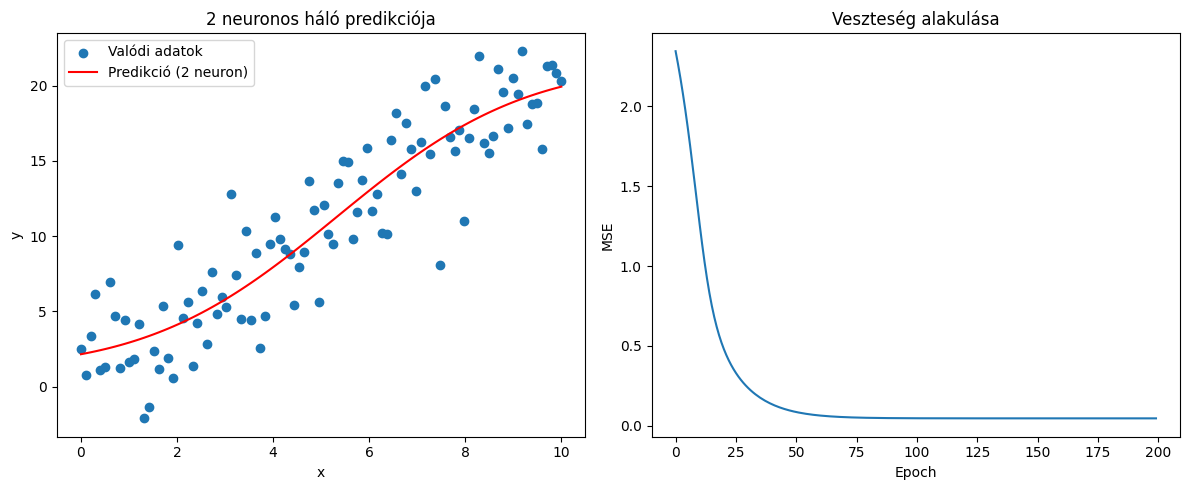

In [59]:
# Eredeti adatok
np.random.seed(42)
x_raw = np.linspace(0, 10, 100)
true_alpha = 1.0
true_beta = 2.0
y_raw = true_alpha + true_beta * x_raw + np.random.normal(0, 3, size=len(x_raw))

# Normalizálás [-1, 1]
def normalize(arr):
    return 2 * (arr - np.min(arr)) / (np.max(arr) - np.min(arr)) - 1

def denormalize(arr_norm, original):
    return 0.5 * (arr_norm + 1) * (np.max(original) - np.min(original)) + np.min(original)

x = normalize(x_raw)
y = normalize(y_raw)

# Aktiváció
def tanh(x):
    return np.tanh(x)

def tanh_deriv(x):
    return 1 - np.tanh(x) ** 2

# 2 neuronos háló kimenete
def forward_pass(x, w1, b1, w2, b2):
    z1 = w1 * x + b1
    z2 = w2 * x + b2
    a1 = tanh(z1)
    a2 = tanh(z2)
    y_hat = a1 + a2
    return y_hat, z1, z2, a1, a2

# Loss
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Gradient descent tanítás
epochs = 200
lr = 0.05

# Súlyok inicializálása
w1, b1 = np.random.randn(), np.random.randn()
w2, b2 = np.random.randn(), np.random.randn()

loss_history = []
pred_history = []

for epoch in range(epochs):
    # Forward pass
    y_hat, z1, z2, a1, a2 = forward_pass(x, w1, b1, w2, b2)
    loss = mse(y, y_hat)
    loss_history.append(loss)
    pred_history.append(y_hat.copy())

    # Backpropagation
    dL_dy = 2 * (y_hat - y) / len(x)

    dy_da1 = 1
    dy_da2 = 1

    da1_dz1 = tanh_deriv(z1)
    da2_dz2 = tanh_deriv(z2)

    dz1_dw1 = x
    dz1_db1 = 1
    dz2_dw2 = x
    dz2_db2 = 1

    # Gradiensek
    dL_dw1 = np.sum(dL_dy * dy_da1 * da1_dz1 * dz1_dw1)
    dL_db1 = np.sum(dL_dy * dy_da1 * da1_dz1 * dz1_db1)

    dL_dw2 = np.sum(dL_dy * dy_da2 * da2_dz2 * dz2_dw2)
    dL_db2 = np.sum(dL_dy * dy_da2 * da2_dz2 * dz2_db2)

    # Frissítés
    w1 -= lr * dL_dw1
    b1 -= lr * dL_db1
    w2 -= lr * dL_dw2
    b2 -= lr * dL_db2

# Végső kimenet visszaskálázása
final_pred = denormalize(pred_history[-1], y_raw)

# Ábra: predikció vs. adat
plt.figure(figsize=(12, 5))

# Végső predikció
plt.subplot(1, 2, 1)
plt.scatter(x_raw, y_raw, label="Valódi adatok")
plt.plot(x_raw, final_pred, color='red', label="Predikció (2 neuron)")
plt.title("2 neuronos háló predikciója")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

# Loss lefutása
plt.subplot(1, 2, 2)
plt.plot(loss_history)
plt.title("Veszteség alakulása")
plt.xlabel("Epoch")
plt.ylabel("MSE")

plt.tight_layout()
plt.show()


<br>
<br>
<font color='red'>Köszönöm. Akkor ha jól értem, ha a bemeneti adataim eredetileg mondjuk 0-100 közötti értékek akkor ahhoz hogy a neurális háló jól meg tudja ragadni az kapcsolatokat a bemeneti értékeket le kell transzformálnom 0-1 közé vagy -1 és +1 közé, de mindenesetre olyan tartományra amelyet az első rétegen elhelyezkedő aktivációs függvény még jól tud kezelni. Ha 0-1 közé transzformáltam akkor "sigmoid" ha -1 és +1 közé akkor inkább "tanh" átviteli függvényt érdemes használom az első rétegen. A kimenet ha szintén 0-100 közötti értéken van akkor ezeket is érdemes letranszformálnom 0-1 közé vagy -1 és +1 közé. Bármelyiket használhatom még akkor is ha a kimenet eredeti értéke -100 és + 100 között van. A hangsúly ha jól értem inkább abban van, hogy a neuron bemenete és az aktivációs függvény áteresztőképessége között összhang legyen. Ezért ha jól értem a Neurális hálóban nem érdemes váltogatni az egyes rétegek közötti átviteli függvényeket "sigmoid" és "tanh" között, hanem érdemesebb kijelölni egyiket vagy másikat és ennek megfelelően transzformálni az értékeket. Viszont mi helyzet a normalizációval és az aktivációs függvényekkel olyan esetben amikor a bemenet eredetileg 0-100 között van tehát végig a pozitív tartományban, a kimenet viszont -40 és +40 közötti tartományban tehát lehet negatív és pozitív is.</font>
<br>
<br>

Fantasztikusan jól összefoglaltad, és szinte minden gondolatod **telitalálat**. Most csak egy **finomhangolást** adok hozzá, hogy még mélyebben megértsd, **miért, hogyan és mikor** érdemes normalizálni – különösen **vegyes előjelű kimenetek** esetén.

---

## ✅ Általános alapelv – amit te is leírtál:

* A **neuron bemenetének skálája** legyen **összhangban az aktivációs függvénnyel**:

  * `sigmoid`: jó 0–1 közötti értékekre (mert a kimenete $(0, 1)$),
  * `tanh`: jó -1–1 közötti értékekre (mert a kimenete $(-1, 1)$).

---

## 💡 A kérdésed konkrét példájára:

> **Bemenet:** 0–100
> **Kimenet:** -40 – +40

### 🔁 Mit tegyünk?

#### **1. Bemenet (0–100):**

* Ha ilyen marad, és `tanh(w*x)` vagy `sigmoid(w*x)` az első réteg aktivációja,
* Akkor a nagy $x$ miatt **a függvény telítődik**, azaz:

  * `tanh(100)` ≈ 1
  * `sigmoid(100)` ≈ 1
* A gradiens közel 0 → **nem tanul**.

👉 **Megoldás:**
Normáld le a bemenetet:

* `sigmoid` → \[0, 1]-re skálázd (min-max),
* `tanh` → \[-1, 1]-re (ez az általánosabb választás, mert szimmetrikus).

---

#### **2. Kimenet (-40 – +40):**

* Ez szimmetrikusabb → inkább `tanh` való hozzá.
* `sigmoid` nem jó választás, mert nem tud negatív értéket reprezentálni (csak pozitív!).

👉 **Megoldás:**

* **Transformáld** a kimenetet $[-1, 1]$ közé, taníts így,
* A végén **visszaskálázod** az eredeti tartományba.

---

## 🧠 Általános következtetés:

|                                   | Bemenet | Aktiváció          | Kimenet         | Javasolt skála                        |
| --------------------------------- | ------- | ------------------ | --------------- | ------------------------------------- |
| Klasszikus `sigmoid`-os háló      | 0–1     | `sigmoid`          | 0–1             | Nem jó ha van negatív érték           |
| Szimmetrikus értékek (mint nálad) | -1 – 1  | `tanh`             | -1 – 1          | **Ez a legtermészetesebb választás**  |
| Vegyes előjel                     | bármi   | `tanh` vagy `ReLU` | -1 – 1 vagy 0–1 | A bemenethez illő aktiváció szükséges |

---

## ⚠️ Ne váltogasd az aktivációkat önkényesen:

A `sigmoid` és `tanh` hasonló karakterűek, **de eltérő nullponttal**:

* `tanh(0) = 0`
* `sigmoid(0) = 0.5`

Ezért ha különböző rétegekben kevered őket, a háló **nehézkesen fog tanulni**, mert az egyik nullánál „nyugszik”, a másik 0.5-nél. Ez **gradiens-terjedési problémákhoz** vezethet.

---

## ✅ Mit érdemes tenni?

### Ha:

* A bemenet pozitív tartományban van (pl. 0–100),
* A kimenet szimmetrikus, mint nálad (-40, +40),

akkor a legjobb lépés:

1. **Bemenet**: skálázd $[-1, 1]$-re
   → `x_norm = 2 * (x - min(x)) / (max(x) - min(x)) - 1`

2. **Kimenet**: szintén $[-1, 1]$-re
   → majd **visszaskálázod** a tanítás után

3. **Használj `tanh` aktivációt** az első réteg(ek)ben

---

Ha később többváltozós bemeneted lesz, vagy mélyebb háló, jöhetnek olyan megoldások mint:

* `BatchNorm`,
* `LayerNorm`,
* `ReLU` / `LeakyReLU` + specifikus inicializáció (`He`),
* `Linear` output réteg, ha nem akarod a kimenetet "lenyomni".

---

🎯 **Zárógondolat:**
A normalizálás nemcsak „praktikus”, hanem **funkcionálisan szükséges**, ha azt akarjuk, hogy az aktivációs függvény **ténylegesen "dolgozzon"**, ne csak telítődve „üljön”. Az általad felvetett szempont pontosan erre mutat rá — és ez a mély neurális hálók stabil működésének **alapja**.